In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv('bank-additional-full.csv', sep=';')

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop(columns='y')
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(4, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    random_state=42,

    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Params:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Params: {'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 157}
Accuracy: 0.9110220927409566
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.62      0.56      0.59       935

    accuracy                           0.91      8238
   macro avg       0.78      0.76      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [5]:
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_probs > 0.42).astype(int)  # Try 0.4 instead of 0.5

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7303
           1       0.58      0.70      0.63       935

    accuracy                           0.91      8238
   macro avg       0.77      0.82      0.79      8238
weighted avg       0.92      0.91      0.91      8238



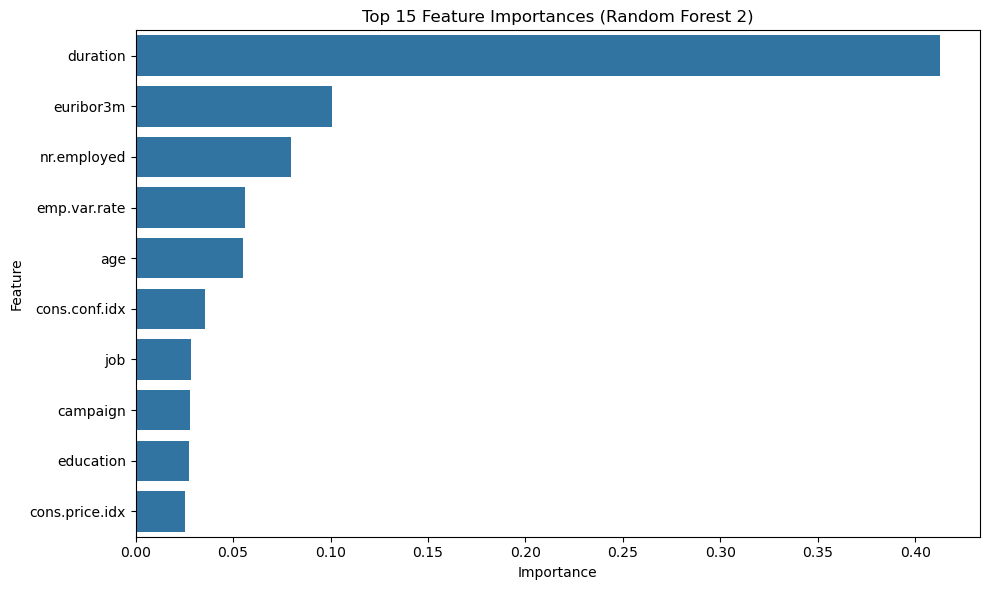

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importances = best_model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature')
plt.title("Top 15 Feature Importances (Random Forest 2)")
plt.tight_layout()
plt.show()
